<a href="https://colab.research.google.com/github/KaranKhirsariya/machine-learning/blob/master/Fashion_MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification basic example using Tensorflow 2.

There is not much difference in the API usage from previous tensorflow version except this will be by default in eager mode.

In [3]:
!pip install tensorflow-gpu==2.0.0-alpha0

    100% |████████████████████████████████| 332.1MB 71kB/s 
    100% |████████████████████████████████| 419kB 13.3MB/s 
    100% |████████████████████████████████| 61kB 25.6MB/s 
    100% |████████████████████████████████| 3.0MB 7.4MB/s 


No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.2 LTS
Release:	18.04
Codename:	bionic


In [26]:
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


## Load Data

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [12]:
(training_data, training_label), (testing_data, testing_label) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Display sample data

9
(28, 28)


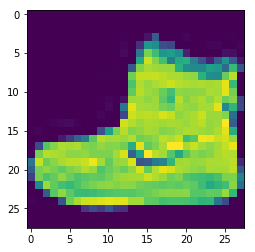

In [41]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0])
print(training_label[0])
print(training_data[0].shape)

### Normalize image data

Divide data pixels by 255 so that data comes in range  0 and 1. It is easier for neural network to work around normalized data.

In [0]:
normed_training_data = training_data / 255.0
normed_testing_data = testing_data / 255.0

## Model

In [0]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1024, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### train the model

In [52]:
model.fit(normed_training_data, training_label, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.4724 - accuracy: 0.8295
Epoch 2/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.3594 - accuracy: 0.8676
Epoch 3/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.3209 - accuracy: 0.8805
Epoch 4/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2961 - accuracy: 0.8903
Epoch 5/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2800 - accuracy: 0.8956


### Evaluate the model

In [53]:
model.evaluate(normed_testing_data,testing_label)

10000/10000 [==============================] - 1s 107us/sample - loss: 0.3372 - accuracy: 0.8769


[0.3371944939732552, 0.8769]

### Exploration
add callback for stopping training if model accuracy reaches the goal

In [0]:
class MyCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if(logs.get('loss')<0.4):
      print('Reached 60% accuracy so stopping training')
      self.model.stop_training = True
callbacks = MyCallback()

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
model.fit(normed_training_data, training_label, epochs = 5, callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.4739 - accuracy: 0.8289
Epoch 2/5
60000/60000 [==============================] - 9s 142us/sample - loss: 0.3586 - accuracy: 0.8683
